# Evolutionary H-R Diagrams 

Figure 8.5 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

H-R Diagrams showing the evolution of stars with mass M = 1, 3, 10, and 30 M<sub>sun</sub>.  Two
panels
 * Core hydrogen burning and shell hydrogen burning evolution.
 * Core helium + shell hydrogen burning and shell helium + shell hydrogen burning evolution.

Data are from models computed using MESA (http://mesa.sourceforge.net).

In [6]:
import os
import sys
import math
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=DeprecationWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [7]:
plotFile = 'Fig8_5.png' 

# graphic aspect ratio = width/height

aspect = 2

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data Files

Data are effective temperature (T<sub>eff</sub>) and luminosity (L/L<sub>sun</sub>) for stars of masses 1, 3,
10, and 30  M<sub>sun</sub> starting on the zero-age main sequence (ZAMS) and ending either at envelope loss (1 
and 3 M<sub>sun</sub>) or core carbon ignition (10 and 30 M<sub>sun</sub>).  These data are extracted in CSV 
format from the output of MESA models.

Data in the files for each mass are in 3 columns:
 * `logTeff_<mass>` = log T<sub>eff</sub>
 * `logL_<mass>` = log L/L<sub>sun</sub>
 * `Stage_<mass>` = evolutionary stage: 1=core H, 2=shell H, 3=core He+shell H, 4=shell He + shell H
    
The CSV file reading is tricky as to pack all this into one CSV, each pair of density and temperature for
each data set has different numbers of rows.  The pandas read_csv() format reads in everything up to the
maximum number of rows across all data, and then fills in blanks as NaNs (not-a-number).  The "trick" here
is to use the numpy.isfinite() method to restrict attention to the non-blank (non-NaN) data in each vector.

In [8]:
dataDir = 'HREvolution'

dataFile = f'{dataDir}/HRDiagrams_all.csv'

data = pd.read_csv(dataFile)

Teff = {}
Lsun = {}
stage = {}

massList = ['1','3','10','30']

for mass in massList:
    logTeff = np.array(data[f'logTeff_{mass}'])
    logLsun = np.array(data[f'logL_{mass}'])
    es = np.array(data[f'Stage_{mass}'])
    
    Teff[mass] = 10.0**logTeff[np.isfinite(logTeff)]
    Lsun[mass] = 10.0**logLsun[np.isfinite(logLsun)]
    stage[mass] = es[np.isfinite(es)]

### Plotting limits

Set these by hand from looking at the model grids


In [9]:
# Teff limits

minT = 35000
maxT = 2200
    
# Luminosity Limits

minL = 0.5 # L/Lsun
maxL = 1.5e6

## Figure 8.5

Two panels
 * Left: H-R diagram for stages 1 (H core fusion) and 2 (H shell fusion)
 * Right: H-R diagram for stages 3 (He core + H shell fusion) and 4 (He + H shell fusion)
 
In each, stage 1/3 is a solid line, stage 2/4 is a dashed line.

Add annotations as needed.

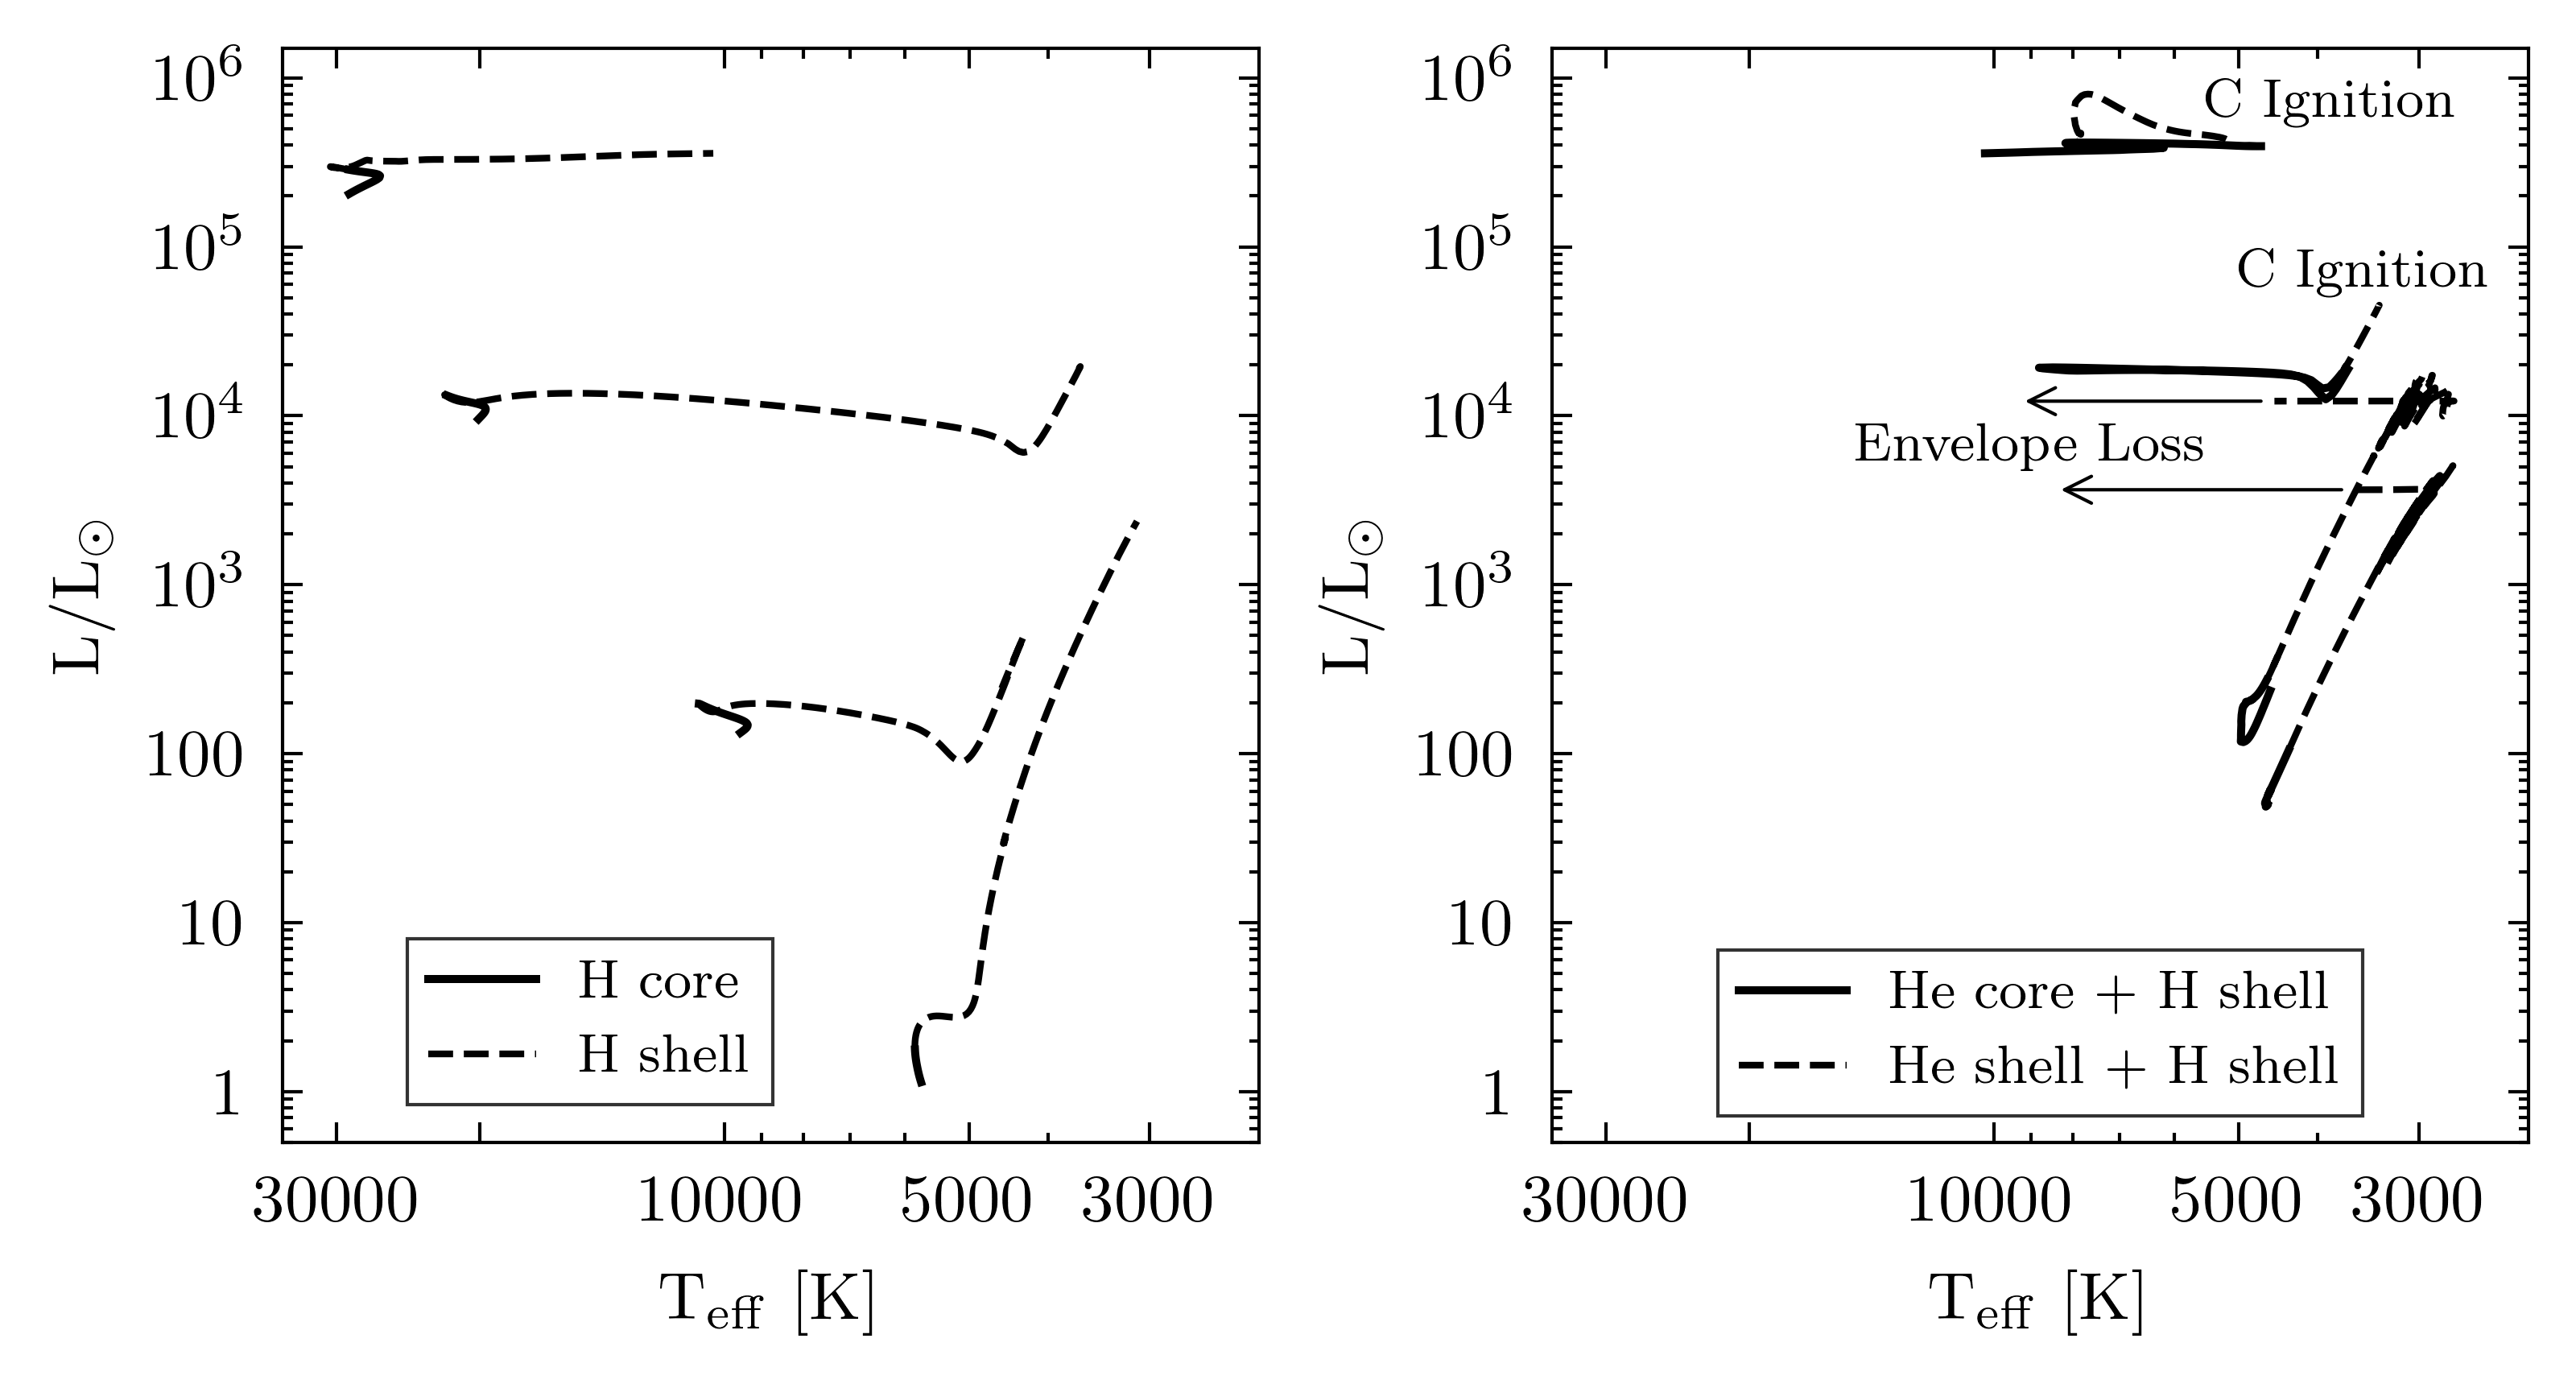

In [10]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
    
fig.subplots_adjust(wspace=0.3, hspace=0)

# panel 1: H-core and H-shell fusion

ax1.set_xlim(minT,maxT)
ax1.set_xscale('log')
ax1.set_ylim(minL,maxL)
ax1.set_yscale('log')
ax1.tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.xaxis.set_minor_formatter(NullFormatter())
ax1.set_xticks([3000.,5000.,10000.,20000.,30000.])
ax1.set_xticklabels(['3000','5000','10000','','30000'])
ax1.set_xlabel(r'T$_{\rm eff}$ [K]', fontsize=axisFontSize)
ax1.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.yaxis.set_minor_formatter(NullFormatter())
ax1.set_yticks([1,10,100,1000,1e4,1e5,1e6])
ax1.set_yticklabels(['1','10','100',r'10$^3$',r'10$^4$',r'10$^5$',r'10$^6$'])
ax1.set_ylabel(r'L/L$_{\odot}$', fontsize=axisFontSize)

for mass in massList:
    stage1 = np.where(stage[mass]==1)
    stage2 = np.where(stage[mass]==2)
    if mass=='1':
        label1 = 'H core'
        label2 = 'H shell'
    else:
        label1 = None
        label2 = None    
    ax1.plot(Teff[mass][stage1],Lsun[mass][stage1],'-',color='black',lw=1.2,label=label1)
    ax1.plot(Teff[mass][stage2],Lsun[mass][stage2],'--',color='black',lw=1.0,label=label2)
    
legend1 = ax1.legend(fontsize=8,loc='lower left',fancybox=False,edgecolor='black',bbox_to_anchor=(0.1,0.01))
frame1 = legend1.get_frame()
frame1.set_linewidth(0.5)

# panel 2: He-core + H shell and He-shell + H-shell

ax2.set_xlim(minT,maxT)
ax2.set_xscale('log')
ax2.set_ylim(minL,maxL)
ax2.set_yscale('log')
ax2.tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')
ax2.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax2.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.set_xticks([3000.,5000.,10000.,20000.,30000.])
ax2.set_xticklabels(['3000','5000','10000','','30000'])
ax2.set_xlabel(r'T$_{\rm eff}$ [K]', fontsize=axisFontSize)
ax2.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax2.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax2.yaxis.set_minor_formatter(NullFormatter())
ax2.set_yticks([1,10,100,1000,1e4,1e5,1e6])
ax2.set_yticklabels(['1','10','100',r'10$^3$',r'10$^4$',r'10$^5$',r'10$^6$'])
ax2.set_ylabel(r'L/L$_{\odot}$', fontsize=axisFontSize)

for mass in massList:
    stage3 = np.where(stage[mass]==3)
    stage4 = np.where(stage[mass]==4)
    if mass=='1':
        label3 = 'He core + H shell'
        label4 = 'He shell + H shell'
    else:
        label3 = None
        label4 = None
    ax2.plot(Teff[mass][stage3],Lsun[mass][stage3],'-',color='black',lw=1.2,label=label3)
    ax2.plot(Teff[mass][stage4],Lsun[mass][stage4],'--',color='black',lw=1.0,label=label4)
    
ax2.text(5500,7e5,'C Ignition',fontsize=8,va='center',ha='left')
ax2.text(3500,5e4,'C Ignition',fontsize=8,va='bottom',ha='center')

for mass in ['1','3']:
    envT = Teff[mass][-1]
    envL = Lsun[mass][-1]
    ax2.annotate(s='', xy=(envT,envL), xytext=(envT+5000,envL), arrowprops=dict(arrowstyle='<-',lw=0.5))
ax2.text(9000,6500,'Envelope Loss',va='center',ha='center',fontsize=8)    

legend2 = ax2.legend(fontsize=8,loc='lower center',fancybox=False,edgecolor='black')
frame2 = legend2.get_frame()
frame2.set_linewidth(0.5)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')